<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

Printing the files' names in its "recommender_social_graph" directory:

In [3]:
import sys
print(sys.path)

['c:\\Users\\fabio\\Desktop\\complex-systems-social-graph\\recommender_social_graph\\content\\notebook', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310', '', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib', 'c:\\Users\\fabio\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin', '.', '../../']


Importing mandatory methods for the notebook:

In [4]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
sys.path.append('.')
sys.path.append('../../')
%load_ext autoreload
%autoreload 2
from graph_creation import create_graph
from abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from metrics import polarisation, sarle_bimodality, disagreement
from content.metrics import feed_entropy, feed_satisfaction
from content.content_recommender import simulate_epoch_content_recommender

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0            0.789
           1           -0.938
           2            0.462
           3           -0.65
           4            0.816
           5           -0.081
           6           -0.492
           7           -0.123
           8           -0.244
           9            0.078
          10            0.546
          11           -0.584
          12           -0.829
          13           -0.413
          14           -0.975
          15           -0.723
          16            0.773
          17           -0.313
          18           -0.767
          19           -0.965
          20            0.247
          21           -0.571
          22           -0.313
          23            0.577
          24           -0.868
          25           -0.75
          26            0.134
          27           -0.082
          28            0.779
          29            0.455
          30           -0

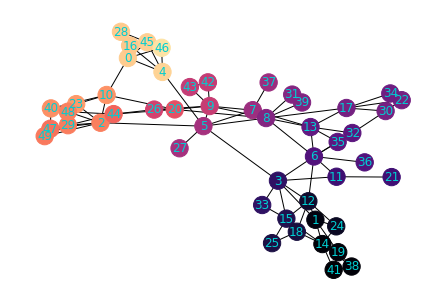

In [5]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(50, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating an epoch with ABEBA model (with no Recommender):

  node label    opinion value
------------  ---------------
           0            0.767
           1           -0.921
           2            0.462
           3           -0.661
           4            0.878
           5           -0.06
           6           -0.481
           7           -0.123
           8           -0.229
           9            0.077
          10            0.549
          11           -0.555
          12           -0.841
          13           -0.413
          14           -0.975
          15           -0.7
          16            0.779
          17           -0.324
          18           -0.767
          19           -0.941
          20            0.247
          21           -0.571
          22           -0.313
          23            0.582
          24           -0.868
          25           -0.724
          26            0.141
          27           -0.075
          28            0.821
          29            0.478
          30           -0.307
          31 

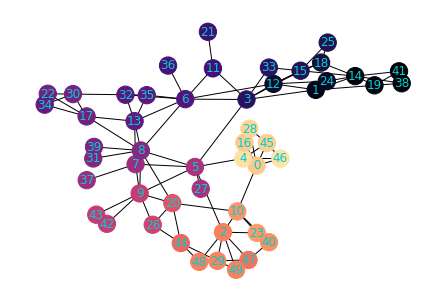

In [6]:
# Simulating an epoch and printing the opinion graph obtained
G = simulate_epoch_updated(G, 50, 50)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0           -0.354
           1           -0.208
           2            0.79
           3           -0.198
           4           -0.36
           5            0.056
           6           -0.41
           7            0.14
           8           -0.382
           9            0.101
          10            0.675
          11            0.103
          12           -0.44
          13            0.365
          14            0.215
          15            0.779
          16           -0.128
          17           -0.627
          18           -0.369
          19           -0.911
          20           -0.88
          21            0.192
          22            0.037
          23           -0.343
          24           -0.169
          25           -0.072
          26           -0.436
          27            0.731
          28            0.715
          29           -0.821
          30            0.109

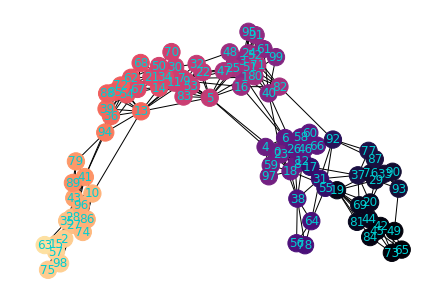

In [7]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(100, [2], avg_friend = 5, hp_alpha=5, hp_beta=0.0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

Epoch	Random	Normal	Nudge	Nudge Var
Starting Nodes:
  node label    opinion value
------------  ---------------
           0           -0.354
           1           -0.208
           2            0.79
           3           -0.198
           4           -0.36
           5            0.056
           6           -0.41
           7            0.14
           8           -0.382
           9            0.101
          10            0.675
          11            0.103
          12           -0.44
          13            0.365
          14            0.215
          15            0.779
          16           -0.128
          17           -0.627
          18           -0.369
          19           -0.911
          20           -0.88
          21            0.192
          22            0.037
          23           -0.343
          24           -0.169
          25           -0.072
          26           -0.436
          27            0.731
          28            0.715
          29           -

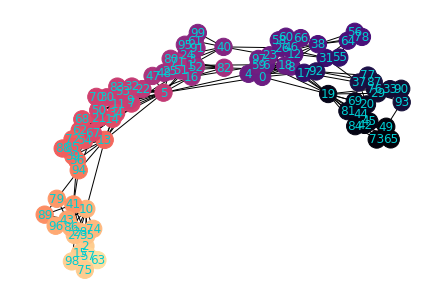

No Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.326
           1           -0.137
           2            0.466
           3           -0.185
           4           -0.317
           5           -0.106
           6           -0.336
           7           -0.024
           8           -0.387
           9           -0.046
          10            0.425
          11           -0.013
          12           -0.377
          13            0.108
          14            0.026
          15            0.472
          16           -0.14
          17           -0.387
          18           -0.367
          19           -0.439
          20           -0.481
          21            0.043
          22           -0.067
          23           -0.351
          24           -0.168
          25           -0.117
          26           -0.371
          27            0.443
          28            0.433
          29           -0.501
          30       

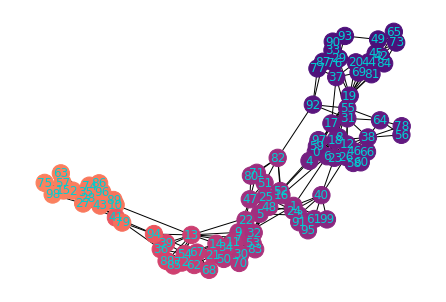

Random Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.098
           1            0.054
           2           -0.157
           3            0.223
           4            0.178
           5            0.371
           6           -0.029
           7            0.052
           8            0.047
           9           -0.019
          10           -0.165
          11            0.109
          12            0.018
          13           -0.06
          14           -0.209
          15           -0.024
          16           -0.217
          17           -0.112
          18           -0.08
          19            0.069
          20            0.069
          21           -0.005
          22            0.101
          23           -0.081
          24           -0.089
          25            0.202
          26            0.166
          27           -0.071
          28            0.055
          29           -0.16
          30     

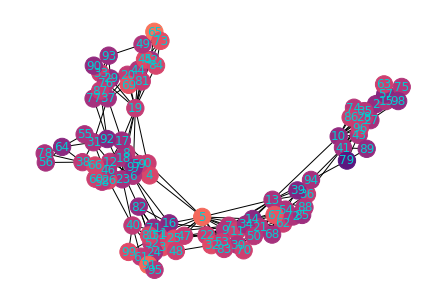

Normal Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.004
           1            0.006
           2            0.034
           3            0.007
           4           -0.019
           5            0.007
           6           -0.004
           7           -0.005
           8           -0.006
           9            0.014
          10           -0.058
          11           -0.052
          12            0.015
          13           -0.005
          14            0.039
          15           -0.016
          16            0.02
          17            0.024
          18            0.01
          19            0.005
          20           -0.004
          21            0.013
          22            0.012
          23            0.024
          24           -0.002
          25            0.017
          26            0.01
          27            0.017
          28            0.04
          29           -0.009
          30      

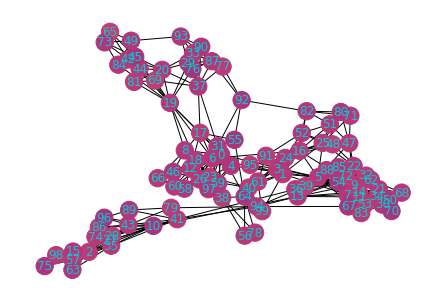

Nudge Recommender Nodes:
  node label    opinion value
------------  ---------------
           0               -0
           1               -0
           2                0
           3               -0
           4               -0
           5               -0
           6               -0
           7               -0
           8               -0
           9               -0
          10                0
          11               -0
          12               -0
          13               -0
          14               -0
          15                0
          16               -0
          17               -0
          18               -0
          19               -0
          20               -0
          21               -0
          22               -0
          23               -0
          24               -0
          25               -0
          26               -0
          27                0
          28                0
          29               -0
          30   

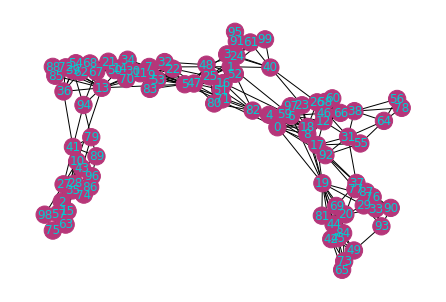

Nudge Opt Recommender Nodes:
  node label    opinion value
------------  ---------------
           0               -0
           1               -0
           2                0
           3               -0
           4               -0
           5               -0
           6               -0
           7               -0
           8               -0
           9               -0
          10                0
          11               -0
          12               -0
          13               -0
          14               -0
          15                0
          16               -0
          17               -0
          18               -0
          19               -0
          20               -0
          21               -0
          22               -0
          23               -0
          24               -0
          25               -0
          26               -0
          27                0
          28                0
          29               -0
          3

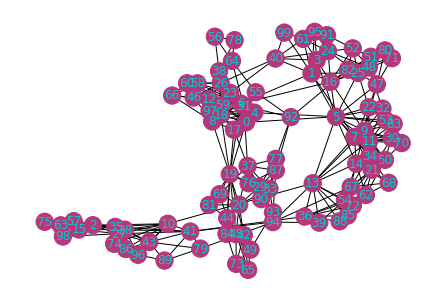

Similar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.6
           1           -0.175
           2            0.531
           3           -0.064
           4           -0.577
           5            0.144
           6           -0.516
           7            0.191
           8           -0.59
           9            0.226
          10            0.501
          11            0.198
          12           -0.581
          13            0.253
          14            0.22
          15            0.531
          16            0.041
          17           -0.6
          18           -0.564
          19           -0.609
          20           -0.634
          21            0.244
          22            0.174
          23           -0.534
          24           -0.061
          25           -0.001
          26           -0.421
          27            0.516
          28            0.515
          29           -0.633
          30       

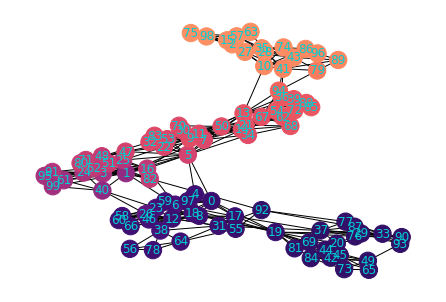

Unsimilar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.133
           1           -0.07
           2            0.451
           3           -0.216
           4           -0.275
           5           -0.016
           6           -0.383
           7           -0.035
           8           -0.406
           9           -0.008
          10            0.328
          11           -0.012
          12           -0.238
          13            0.091
          14            0.049
          15            0.579
          16           -0.184
          17           -0.387
          18           -0.292
          19           -0.359
          20           -0.549
          21            0.061
          22           -0.016
          23           -0.253
          24           -0.105
          25           -0.186
          26           -0.338
          27            0.415
          28            0.47
          29           -0.58
          30  

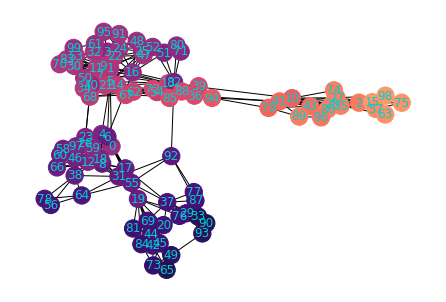

Polarisation (starting): 28.224637285833683
Bimodality (starting): -0.9905042510138365
Disagreement (starting - mean): 0.7213317007829424
Disagreement (starting - std): 0.7249131837925802
Entropy (starting - mean): nan
Entropy (starting - std): nan
Satisfaction (starting - mean): nan
Satisfaction (starting - std): nan
Polarisation (no recommender): 10.245722257202015
Bimodality (no recommender): -1.3635321530074491
Disagreement (no recommender - mean): 0.3189853401462208
Disagreement (no recommender - std): 0.293951192438746
Entropy (no recommender - mean): nan
Entropy (no recommender - std): nan
Satisfaction (no recommender - mean): nan
Satisfaction (no recommender - std): nan
Polarisation (random recommender): 2.1181906030667093
Bimodality (random recommender): 2.143410784409744
Disagreement (random recommender - mean): 1.088454530546974
Disagreement (random recommender - std): 0.6575428678071584
Entropy (random recommender - mean): 0.8407827793156293
Entropy (random recommender - st

In [8]:
# Simulating an epoch and printing the opinion graph obtained
starting_G = G.copy()
random_G = G.copy()
normal_G = G.copy()
nudge_G = G.copy()
nudge_var_G = G.copy()
similar_G = G.copy()
unsimilar_G = G.copy()
random_param = {'n_post': 4}
normal_param = {'normal_mean': 0.0, 'normal_std': 0.1, 'n_post': 4}
nudge_param = {'nudge_goal': 0.0, 'n_post': 4}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.2}
print(f'Epoch\tRandom\tNormal\tNudge\tNudge Var')
for i in range(100):
  G = simulate_epoch_updated(G, 50, 50)
  random_G = simulate_epoch_content_recommender(random_G, 50, 50,
                                                strat_param=random_param)
  normal_G = simulate_epoch_content_recommender(normal_G, 50, 50, 
                                               strategy="normal", 
                                               strat_param=normal_param)
  nudge_G = simulate_epoch_content_recommender(nudge_G, 50, 50,
                                               strategy="nudge",
                                               strat_param=nudge_param)

  nudge_opt_G = simulate_epoch_content_recommender(nudge_var_G, 50, 50,
                                               strategy="nudge_opt",
                                               strat_param=nudge_param)
  similar_G = simulate_epoch_content_recommender(similar_G, 50, 50, 
                                                 strategy="similar", 
                                                 strat_param=similar_param)
  unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, 50, 50, 
                                                   strategy="unsimilar",
                                                   strat_param=unsimilar_param)
  #print(f'{i} \t {np.round(np.mean(list(feed_satisfaction(random_G).values())), 3)}\t{np.round(np.mean(list(feed_satisfaction(normal_G).values())), 3)}\t{np.round(np.mean(list(feed_satisfaction(nudge_G).values())), 3)}\t{np.round(np.mean(list(feed_satisfaction(nudge_var_G).values())), 3)}\t')
  

# Showing starting graph and its nodes' opinions
colors = list(nx.get_node_attributes(starting_G, 'opinion').values())
labels =  nx.get_node_attributes(starting_G, 'opinion')
print("Starting Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Starting Graph:")
nx.draw(starting_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()


# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print("No Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("No Recommender Graph:")
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with random content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(random_G, 'opinion').values())
labels =  nx.get_node_attributes(random_G, 'opinion')
print("Random Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Random Recommender Graph:")
nx.draw(random_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with normal content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(normal_G, 'opinion').values())
labels =  nx.get_node_attributes(normal_G, 'opinion')
print("Normal Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Normal Recommender Graph:")
nx.draw(normal_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_G, 'opinion')
print("Nudge Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Recommender Graph:")
nx.draw(nudge_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge (optimized) content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_opt_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_opt_G, 'opinion')
print("Nudge Opt Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Opt Recommender Graph:")
nx.draw(nudge_opt_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with similar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(similar_G, 'opinion').values())
labels =  nx.get_node_attributes(similar_G, 'opinion')
print("Similar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Similar Recommender Graph:")
nx.draw(similar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with unsimilar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(unsimilar_G, 'opinion').values())
labels =  nx.get_node_attributes(unsimilar_G, 'opinion')
print("Unsimilar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Unsimilar Recommender Graph:")
nx.draw(unsimilar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

graphs = [starting_G, G, random_G, normal_G, nudge_G, nudge_opt_G, similar_G, unsimilar_G]
rec_text = ["starting", "no recommender", "random recommender", "normal recommender",
            "nudge recommender", "nudge opt recommender", "similar recommender", 
            "unsimilar recommender"]
for g, text in zip(graphs, rec_text):
  print(f"Polarisation ({text}): {polarisation(g)}")
  print(f"Bimodality ({text}): {sarle_bimodality(g)}")
  #print(f"Disagreement ({text}): {disagreement(g)}")
  print(f"Disagreement ({text} - mean): {np.mean(list(disagreement(g).values()))}")
  print(f"Disagreement ({text} - std): {np.std(list(disagreement(g).values()))}")
  #print(f"Entropy ({text}): {feed_entropy(g)}")
  print(f"Entropy ({text} - mean): {np.mean(list(feed_entropy(g).values()))}")
  print(f"Entropy ({text} - std): {np.std(list(feed_entropy(g).values()))}")
  #print(f"Satisfaction ({text}): {feed_satisfaction(g)}")
  print(f"Satisfaction ({text} - mean): {np.mean(list(feed_satisfaction(g).values()))}")
  print(f"Satisfaction ({text} - std): {np.std(list(feed_satisfaction(g).values()))}")

